In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [9]:
## Load the data and concatenate them into a single DataFrame
lung1 = pd.read_csv("lung/GSE87340.csv.zip")
lung2 = pd.read_csv("lung/GSE60052.csv.zip")
lung3 = pd.read_csv("lung/GSE40419.csv.zip")
lung4 = pd.read_csv("lung/GSE37764.csv.zip")
lung_1_4 = pd.concat([lung1, lung2, lung3, lung4])

In [10]:
## Print the first 5 rows and 10 columns
print(lung_1_4.iloc[:,0:10].head())

           ID    class  ENSG00000000003  ENSG00000000005  ENSG00000000419  \
0  SRR4296063   Normal        10.728260         4.668142        10.278195   
1  SRR4296064    Tumor        11.332606         2.329988        10.127734   
2  SRR4296065   Normal         9.951182         4.264426        10.288874   
3  SRR4296066    Tumor        12.185680         2.798643        10.178582   
4  SRR4296067   Normal         9.875179         2.922071        10.444479   

   ENSG00000000457  ENSG00000000460  ENSG00000000938  ENSG00000000971  \
0        10.184036         8.215333        11.310861        13.178872   
1        10.167900         8.174060        10.399611        13.208972   
2        10.093258         8.011385        11.814572        14.038661   
3        10.401606         8.902321        10.294009        13.170466   
4        10.435843         8.692961        12.604934        13.538341   

   ENSG00000001036  
0        11.469473  
1        11.510862  
2        11.651766  
3        11.54

In [11]:
lung_1_4.isna().sum()

,0
ID,0
class,0
ENSG00000000003,0
ENSG00000000005,0
ENSG00000000419,0
...,...
ENSG00000285990,0
ENSG00000285991,0
ENSG00000285992,0
ENSG00000285993,0


In [12]:
lung_1_4.isna().sum().sum()

np.int64(0)

In [16]:
## plotting the distribution of samples corresponding to each lung cancer type
df = lung_1_4['class'].value_counts().reset_index()

In [21]:
df.head()

,class,count
0,Tumor,191
1,Normal,110
2,Normal,6
3,Tumor,6


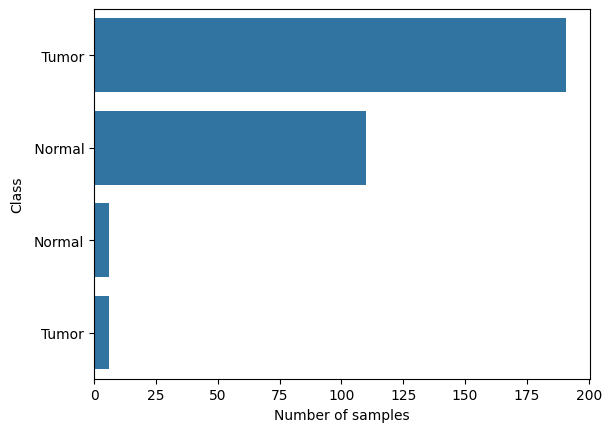

In [23]:
## visualize the classes
sns.barplot(x = "count", y = "class", data=df)
plt.xlabel("Number of samples")
plt.ylabel("Class")
plt.show()

In [24]:
set(lung_1_4['class'])

{' Normal', ' Tumor', 'Normal', 'Tumor'}

In [27]:
## rename those right away using the following replace method
lung_1_4['class'] = lung_1_4['class'].replace(' Normal', 'Normal')
lung_1_4['class'] = lung_1_4['class'].replace(' Tumor', 'Tumor')

In [28]:
## plotting the distribution of samples corresponding to each lung cancer type
df = lung_1_4['class'].value_counts().reset_index()

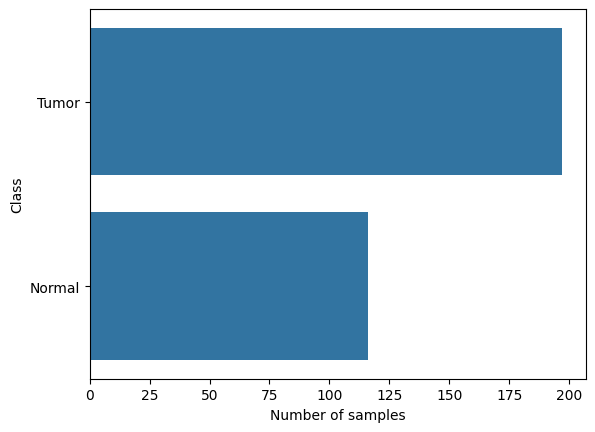

In [29]:
## visualize the classes
sns.barplot(x = "count", y = "class", data=df)
plt.xlabel("Number of samples")
plt.ylabel("Class")
plt.show()

In [30]:
lung_1_4_m = pd.melt(lung_1_4.iloc[:,1:12], id_vars =
 "class")

<ipython-input-31-ce0952c6c65b>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


Text(0, 0.5, 'Expression')

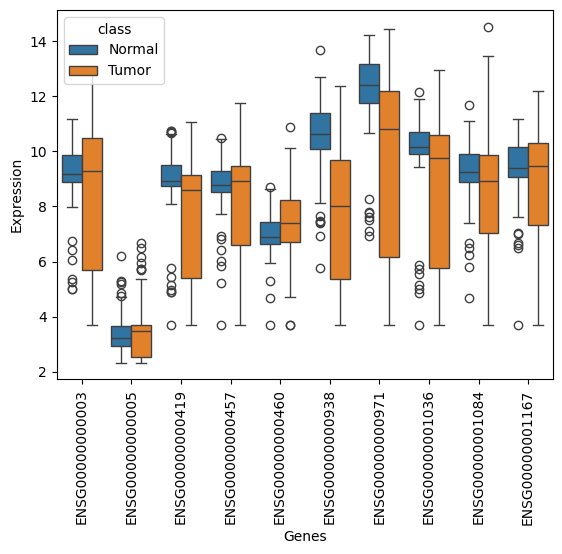

In [31]:
ax = sns.boxplot(x = "variable" , y = "value", data =
lung_1_4_m, hue = "class")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("Genes")
plt.ylabel("Expression")

In [37]:
## Drop the ID and class columns in the dataset, and convert it to a NumPy ndarray
x_data = lung_1_4.drop(['class', 'ID'], axis = 1).values
## Create a NumPy ndarray for the labels from the subset data
y_data = lung_1_4['class'].values
## Convert the categorical data to numbers
classes = lung_1_4['class'].unique().tolist()
print(classes)
['Normal', 'Tumor']
## Convert the classes into ordinals
func = lambda x: classes.index(x)
y_data = np.asarray([func(i) for i in y_data], dtype ="float32")
## Train test split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 42, test_size=0.25, stratify = y_data)

['Normal', 'Tumor']


In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((234, 58735), (79, 58735), (234,), (79,))

In [39]:
model_lung1 = LogisticRegression()
model_lung1.fit(X_train, y_train)

LogisticRegression()

In [41]:
pred = model_lung1.predict(X_test[12].reshape(1,-1))
print(pred)

[1.]


In [42]:
## Model predictions on all samples from the test data
all_pred_lung= model_lung1.predict(X_test)
## Accuracy score
print(model_lung1.score(X_test, y_test))

0.9620253164556962


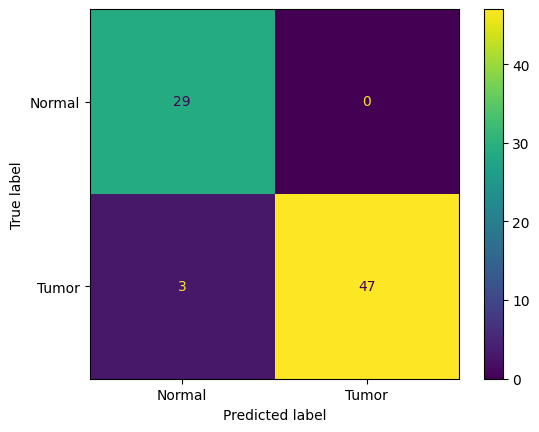

In [43]:
## Confusion matrix
cm = confusion_matrix(y_test, all_pred_lung)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels = ["Normal", 'Tumor'])
disp.plot()
plt.show()

In [44]:
classification_report(y_test, all_pred_lung)

'              precision    recall  f1-score   support\n\n         0.0       0.91      1.00      0.95        29\n         1.0       1.00      0.94      0.97        50\n\n    accuracy                           0.96        79\n   macro avg       0.95      0.97      0.96        79\nweighted avg       0.97      0.96      0.96        79\n'